In [55]:
library(qvalue)
library(ggplot2)
library(dplyr)
library(cowplot)

In [1]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [ ]:
# # all results
# myfile0 = paste0(revision_folder,"Marcs_results_all.csv")
# df0 = read.csv(myfile0, row.names=1)

In [2]:
# leads
myfile = paste0(revision_folder,"Marcs_results_qvalue.csv")
df = read.csv(myfile, row.names=1)
nrow(df)
head(df,2)

[1] 11083

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
7_99442565_A_G,0.03640359,-0.19143557,0.09148769,0.9328839,7,99245817,99277621,27598,99,...,52.19879,0.9,7,99442565,G,1,0.05050505,1,ENSG00000106258,1
7_99143503_A_T,0.02247299,-0.08541319,0.03742278,0.6305276,7,99214569,99230030,27598,99,...,50.00241,0.8,7,99143503,T,1,0.07575758,1,ENSG00000197037,1


In [3]:
nrow(df[df$q_value < 0.1,])

[1] 2262

In [4]:
genes = unique(as.character(df[df$q_value < 0.1,"feature_id"]))

In [5]:
head(genes)

[1] "ENSG00000142166" "ENSG00000142188" "ENSG00000243646" "ENSG00000130714"
[5] "ENSG00000130723" "ENSG00000154945"

In [6]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
endo_eqtl_file = paste0(input_files_dir,"endodiff_eqtl_allconditions_FDR10pct.csv")
df1 = read.csv(endo_eqtl_file)
head(df1)

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips
12_56401085_G_A,ENSG00000197728_RPS26,ips
17_79634162_T_G,ENSG00000214087_ARL16,ips
6_31486901_T_C,ENSG00000198563_DDX39B,ips
4_39446549_G_A,ENSG00000163682_RPL9,ips


In [9]:
genes1 = unique(gsub("_.*","",as.character(df1$feature)))
head(genes1)

[1] "ENSG00000164587" "ENSG00000134809" "ENSG00000197728" "ENSG00000214087"
[5] "ENSG00000198563" "ENSG00000163682"

In [10]:
length(genes)
length(genes1)
length(genes[genes %in% genes1])

[1] 2188

[1] 3240

[1] 1125

In [12]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"
crm_file = paste0(revision_folder, "CRM_association/summary.csv")
crm = read.csv(crm_file)
nrow(crm)

[1] 10003258

In [13]:
head(crm,2)

X,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [15]:
crm = crm[order(crm$pv),]
top_crm = crm[-which(duplicated(crm$gene)),]

In [19]:
top_crm$q_value = qvalue(top_crm$pv)$qvalues

In [23]:
nrow(top_crm[top_crm$q_value<0.1,])

[1] 1781

In [24]:
genes2 = unique(as.character(top_crm[top_crm$q_value<0.1,"gene"]))

In [25]:
length(genes2[genes2 %in% genes])
length(genes2[genes2 %in% genes1])

[1] 761

[1] 965

In [26]:
length(genes[genes %in% genes1])
length(genes[genes %in% genes2])

[1] 1125

[1] 761

In [27]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [29]:
counts = logcounts(sce)

In [30]:
counts[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,5.5207770563,6.4562078,5.878671,4.8608241,5.903640
ENSG00000000419_DPM1,5.3924605058,6.0659226,6.838769,6.6142685,6.512403
ENSG00000000457_SCYL3,0.0001741556,0.3525966,0.000000,0.8259555,2.201697
ENSG00000000460_C1orf112,1.4719275194,4.5369683,4.318528,5.3730090,4.636175
ENSG00000001036_FUCA2,2.9088018801,3.8673273,3.321747,3.7364760,4.917576


In [42]:
stats_df = data.frame(gene = gsub("_.*","",rownames(counts)), 
                                  mean = rowMeans(counts), var = rowVars(counts))
head(stats_df)

,gene,mean,var
ENSG00000000003_TSPAN6,ENSG00000000003,5.4684470,1.169600
ENSG00000000419_DPM1,ENSG00000000419,5.6828451,1.736982
ENSG00000000457_SCYL3,ENSG00000000457,0.7900145,1.257087
ENSG00000000460_C1orf112,ENSG00000000460,3.0843196,1.815009
ENSG00000001036_FUCA2,ENSG00000001036,3.5822585,2.486181
ENSG00000001084_GCLC,ENSG00000001084,1.7308616,2.491006


In [43]:
stats_df$test = 'no'
stats_df$test[stats_df$gene %in% genes] = 'Marc'
stats_df$test[stats_df$gene %in% genes1] = 'endo'
stats_df$test[stats_df$gene %in% genes2] = 'Anna'

In [44]:
head(stats_df)

,gene,mean,var,test
ENSG00000000003_TSPAN6,ENSG00000000003,5.4684470,1.169600,no
ENSG00000000419_DPM1,ENSG00000000419,5.6828451,1.736982,Marc
ENSG00000000457_SCYL3,ENSG00000000457,0.7900145,1.257087,no
ENSG00000000460_C1orf112,ENSG00000000460,3.0843196,1.815009,no
ENSG00000001036_FUCA2,ENSG00000001036,3.5822585,2.486181,no
ENSG00000001084_GCLC,ENSG00000001084,1.7308616,2.491006,no


In [48]:
count_df = stats_df %>% group_by(test) %>% summarise(n=n())
head(count_df)

test,n
Anna,1470
endo,2275
Marc,937
no,6549


In [62]:
p1 = ggplot(count_df, aes(x = test, y=n)) + geom_bar(stat="identity") + theme_classic()

In [63]:
p2 = ggplot(stats_df, aes(x = test, y = mean)) + geom_boxplot() + theme_classic()
p3 = ggplot(stats_df, aes(x = test, y = var)) + geom_boxplot() + theme_classic()

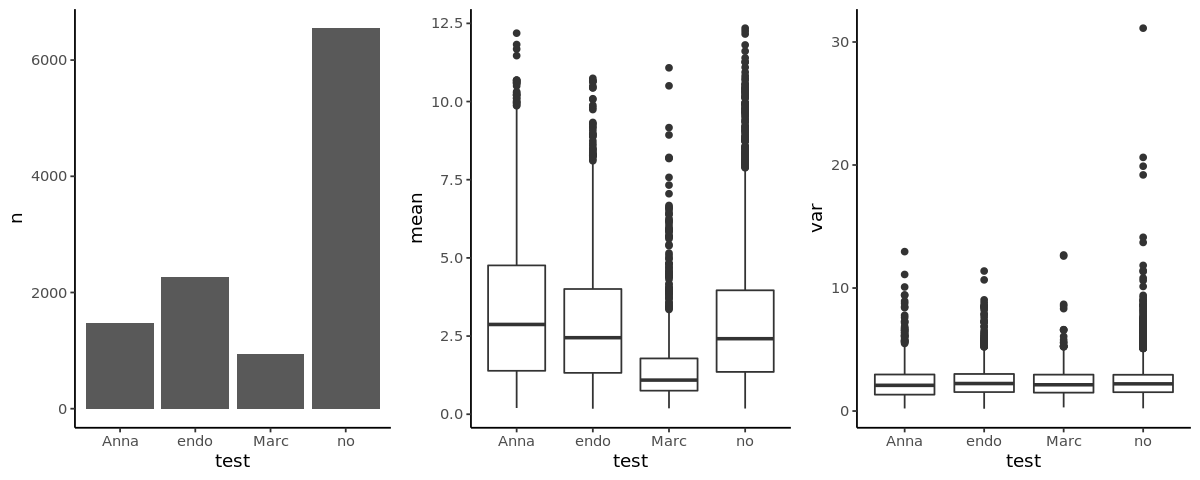

In [64]:
options(repr.plot.width = 10, repr.plot.height = 4)
plot_grid(p1,p2,p3,ncol=3)